In [ ]:
"""
Look at Error Splitting For the 1/8 2/3 soma splitting
tests



"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [4]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

INFO - 2021-01-09 06:36:00,271 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 06:36:00,272 - settings - Setting database.user to celiib
INFO - 2021-01-09 06:36:00,273 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 06:36:00,284 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-09 06:36:00,285 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-09 06:36:00,299 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-09 06:36:00,562 - settings - Setting enable_python_native_blobs to True


In [5]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-09 06:36:01,264 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-09 06:36:01,530 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [6]:
minnie.Decomposition() & "n_error_limbs>3"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135012398582,0,0.25,29.00,=BLOB=,1376990,2794781,4,1,4,2,8,330,131,13929332.12258168,4744489.087608502,25208.79,181.248,177.914,503.855,470.905,5197,0.00037309757239364195,15.748484848484848,8746791.671,174,0.0005941607157777246,29.868,251421367265.7805,24448738.045176186,18049.7790599871,28744.410147479375,1444950386.5849454,5996.9728
864691135012571126,0,0.25,29.00,=BLOB=,1405952,2834699,4,4,0,1,8,434,190,14952565.529701162,5950582.376110614,22558.465,138.374,138.374,462.864,403.433,5410,0.000361810820307311,12.465437788018432,8599310.865,213,0.0006291201800855004,25.399,343080427437.90247,35381025.859495796,22944.586115099886,39896.26992486943,1610706232.1028285,18348.506
864691135337796326,0,0.25,29.00,=BLOB=,564914,1164053,4,3,2,3,21,251,62,6049123.641171044,1248750.7203810683,14560.197,100.047,100.047,437.872,414.532,1212,0.0002003596011413928,4.828685258964144,3135492.196,102,0.0003865421835672781,11.882,49955028484.44275,21604523.06666692,8258.225727846424,15932.116988896103,489755181.22002697,5850.0526
864691135345274271,0,0.25,29.00,=BLOB=,2309163,4637079,4,4,1,3,23,576,236,20113666.76809177,7920953.984248143,18948.512,303.282,272.462,547.291,534.973,7255,0.000360700019725359,12.59548611111111,15854130.617,379,0.00045760945051257743,19.142,420948365210.4778,25465665.476676144,20928.47465675768,26551.3370224858,1110681702.402316,11274.94
864691135373436616,0,0.25,29.00,=BLOB=,1785657,3619863,5,5,1,2,20,494,129,18445793.933226306,4844793.838331169,25974.596,264.538,243.436,470.631,443.913,6676,0.0003619253269426673,13.51417004048583,11972734.25,302,0.0005576002824918627,22.106,297687347090.0846,19022402.5988334,16138.494670802,24863.77304249316,985719692.3512735,8023.5206
864691135609477127,0,0.25,29.00,=BLOB=,1464777,2991787,5,4,2,4,20,308,162,11751915.10167576,6826308.578770805,23111.142,323.323,272.881,562.321,501.13,6281,0.0005344660802650254,20.392857142857142,9236339.157,212,0.0006800313298629556,29.627,310692180364.76105,26010135.328339256,26437.578699020556,33638.022065191806,1465529152.6639671,7043.3789
864691135683949751,0,0.25,29.00,=BLOB=,849129,1726173,4,4,0,1,9,257,119,8963818.95399291,4100767.890448109,20568.989,122.305,12

In [69]:
segment_id = 864691135012571126 #worked
segment_id = 864691135012398582 #worked
segment_id = 864691135683949751 #worked
segment_id = 864691135012398582 

In [70]:
neuron_obj = (minnie.Decomposition & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [ ]:
import neuron_visualizations as nviz
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh"],
                      limb_branch_dict=dict(),
                     mesh_whole_neuron=True)

# Visualizing the Error Branches

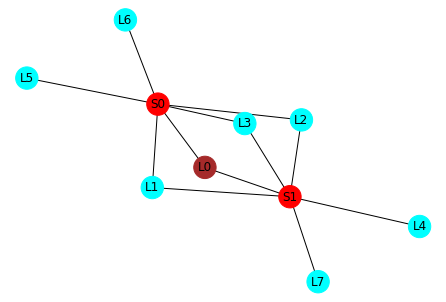

In [71]:
nviz.plot_soma_limb_concept_network(neuron_obj)

# Running and Visualizing Splitting Algorithm

In [73]:
print("hii")

hii


multi_soma_limbs = [0 1 2 3]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[ 86  88]
 [ 86  95]
 [ 86  99]
 [ 86 105]
 [ 86 113]
 [ 86 119]
 [ 86 121]
 [ 88  95]
 [ 88  99]
 [ 88 105]
 [ 88 113]
 [ 88 119]
 [ 88 121]
 [ 95  99]
 [ 95 105]
 [ 95 113]
 [ 95 119]
 [ 95 121]
 [ 99 105]
 [ 99 113]
 [ 99 119]
 [ 99 121]
 [105 113]
 [105 119]
 [105 121]
 [113 119]
 [113 121]
 [119 121]]


---- working on disconnecting 86 and 88
---- This disconnects S0_0 from S1_2  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [86, 76, 77, 79, 87, 88]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 3 57 75 76 77 79 82 87 89]
Short segments to combine = [77 87]


-------- Removing Segments -------------
curr_short_seg_revised = 77
np.su

Angle between 3 and 57 = 144.22 
Angle between 3 and 76 = 35.88 
Angle between 3 and 79 = 93.76 
Angle between 57 and 76 = 18.79 
Angle between 57 and 79 = 129.05 
Angle between 76 and 79 = 60.36 
Final Matches = [[57, 76]]
matched_branches_revised = [[57, 76]]
Aligned Skeleton Parts


Original graph


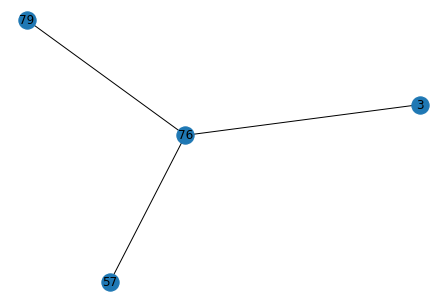

match_branches = [[57, 76]]
edges_to_delete (resolve crossover) = [[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
edges_to_create (resolve crossover) = [[57, 76]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
edges_to_create = [[57, 76]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130}
Comp 1 = {3}
Comp 2 = {77}
Comp 3 = {87}
curr_limb_copy.deleted_edges = [[3, 57], [3, 76], [3, 79]

Angle between 44 and 46 = 174.24 
Angle between 44 and 58 = 172.24 
Angle between 44 and 69 = 16.9 
Angle between 46 and 58 = 170.74 
Angle between 46 and 69 = 16.14 
Angle between 58 and 69 = 9.47 
Final Matches = [[44, 69], [46, 69], [58, 69]]
matched_branches_revised = [[58, 69]]
Aligned Skeleton Parts


Original graph


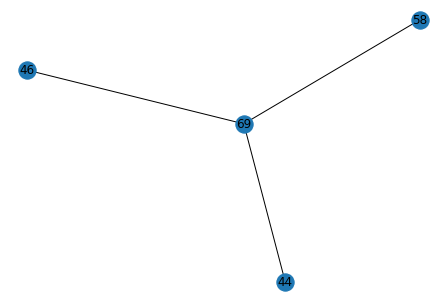

match_branches = [[58, 69]]
edges_to_delete (resolve crossover) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create (resolve crossover) = [[58, 69]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create = [[58, 69]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130}
Comp 1 = {3}
Comp 2 = {44}
Comp 3 = {46}
Comp 4 = {77}
Comp

Angle between 51 and 73 = 133.42 
Angle between 51 and 81 = 14.54 
Angle between 51 and 82 = 21.21 
Angle between 73 and 81 = 38.3 
Angle between 73 and 82 = 25.54 
Angle between 81 and 82 = 162.7 
Final Matches = [[51, 81], [51, 82], [73, 82]]
matched_branches_revised = [[51, 81], [73, 82]]
Aligned Skeleton Parts


Original graph


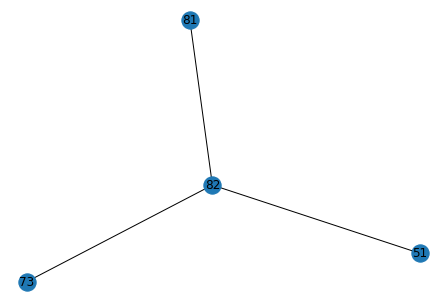

match_branches = [[51, 81], [73, 82]]
edges_to_delete (resolve crossover) = [[51, 73], [51, 82], [73, 81], [81, 82]]
edges_to_create (resolve crossover) = [[51, 81], [73, 82]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[51, 73], [51, 82], [73, 81], [81, 82]]
edges_to_create = [[51, 81], [73, 82]]
Number of connected components = 9
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 45, 47, 49, 52, 53, 54, 55, 57, 61, 62, 63, 70, 71, 73, 76, 78, 82, 86, 93, 101, 102, 103, 104, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 90, 91, 92, 94.0, 95, 98, 99, 100, 105, 106, 110, 117, 121, 122, 123

Angle between 49 and 52 = 104.03 
Angle between 49 and 61 = 58.22 
Angle between 49 and 63 = 62.39 
Angle between 52 and 61 = 21.81 
Angle between 52 and 63 = 14.09 
Angle between 61 and 63 = 170.52 
Final Matches = [[52, 61], [52, 63]]
matched_branches_revised = [[52, 63]]
Aligned Skeleton Parts


Original graph


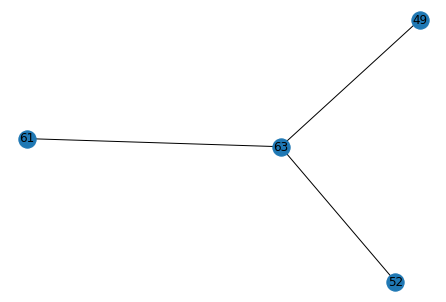

match_branches = [[52, 63]]
edges_to_delete (resolve crossover) = [[49, 52], [49, 61], [49, 63], [52, 61], [61, 63]]
edges_to_create (resolve crossover) = [[52, 63]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[49, 52], [49, 61], [49, 63], [52, 61], [61, 63]]
edges_to_create = [[52, 63]]
Number of connected components = 13
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 90, 91, 92, 94.0, 95, 98, 99, 100, 105, 106, 110, 117, 121, 122, 123, 124, 125, 126, 127}
Comp 3 = {49}
Comp 4 = {18, 36, 37, 61, 70, 71, 78, 93, 101, 102, 1

Angle between 44 and 46 = 174.24 
Angle between 44 and 58 = 172.24 
Angle between 44 and 69 = 16.9 
Angle between 46 and 58 = 170.74 
Angle between 46 and 69 = 16.14 
Angle between 58 and 69 = 9.47 
Final Matches = [[44, 69], [46, 69], [58, 69]]
matched_branches_revised = [[58, 69]]
Aligned Skeleton Parts


Original graph


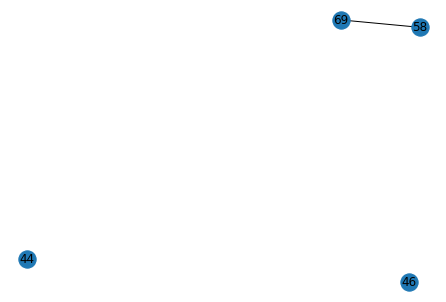

match_branches = [[58, 69]]
edges_to_delete (resolve crossover) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create (resolve crossover) = [[58, 69]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create = [[58, 69]]
Number of connected components = 13
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 90, 91, 92, 94.0, 95, 98, 99, 100, 105, 106, 110, 117, 121, 122, 123, 124, 125, 126, 127}
Comp 3 = {49}
Com

Angle between 3 and 57 = 144.22 
Angle between 3 and 76 = 35.88 
Angle between 3 and 79 = 93.76 
Angle between 57 and 76 = 18.79 
Angle between 57 and 79 = 129.05 
Angle between 76 and 79 = 60.36 
Final Matches = [[57, 76]]
matched_branches_revised = [[57, 76]]
Aligned Skeleton Parts


Original graph


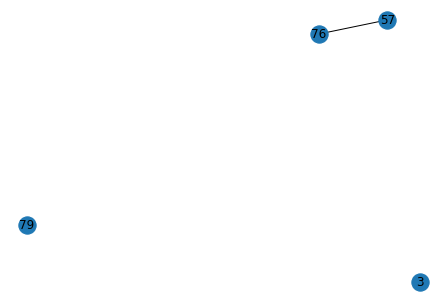

match_branches = [[57, 76]]
edges_to_delete (resolve crossover) = [[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
edges_to_create (resolve crossover) = [[57, 76]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
edges_to_create = [[57, 76]]
Number of connected components = 13
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 90, 91, 92, 94.0, 95, 98, 99, 100, 105, 106, 110, 117, 121, 122

Angle between 51 and 73 = 133.42 
Angle between 51 and 81 = 14.54 
Angle between 51 and 82 = 21.21 
Angle between 73 and 81 = 38.3 
Angle between 73 and 82 = 25.54 
Angle between 81 and 82 = 162.7 
Final Matches = [[51, 81], [51, 82], [73, 82]]
matched_branches_revised = [[51, 81], [73, 82]]
Aligned Skeleton Parts


Original graph


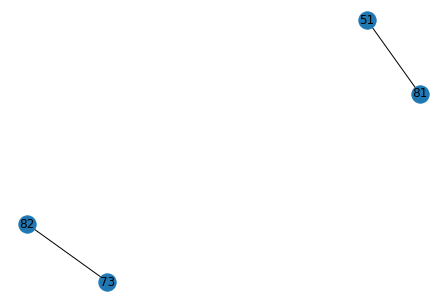

match_branches = [[51, 81], [73, 82]]
edges_to_delete (resolve crossover) = [[51, 73], [51, 82], [73, 81], [81, 82]]
edges_to_create (resolve crossover) = [[51, 81], [73, 82]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[51, 73], [51, 82], [73, 81], [81, 82]]
edges_to_create = [[51, 81], [73, 82]]
Number of connected components = 13
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 

Angle between 75 and 79 = 126.16 
Angle between 75 and 88 = 30.16 
Angle between 75 and 89 = 114.39 
Angle between 79 and 88 = 64.9 
Angle between 79 and 89 = 93.92 
Angle between 88 and 89 = 35.47 
Final Matches = [[75, 88]]
matched_branches_revised = [[75, 88]]
Aligned Skeleton Parts


Original graph


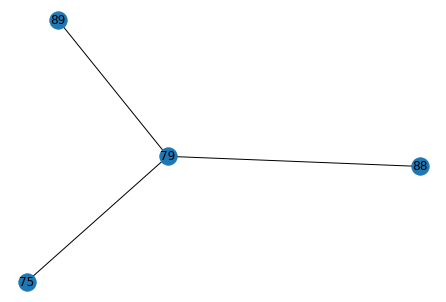

match_branches = [[75, 88]]
edges_to_delete (resolve crossover) = [[75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
edges_to_create (resolve crossover) = [[75, 88]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
edges_to_create = [[75, 88]]
Number of connected components = 15
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {79}
Comp 3 = {128, 129, 130, 2, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 69, 74, 

Angle between 81 and 92 = 19.64 
Angle between 81 and 94 = 30.06 
Angle between 81 and 95 = 140.68 
Angle between 92 and 94 = 151.2 
Angle between 92 and 95 = 33.22 
Angle between 94 and 95 = 10.6 
Final Matches = [[81, 92], [81, 94], [92, 95], [94, 95]]
matched_branches_revised = [[94, 95], [81, 92]]
Aligned Skeleton Parts


Original graph


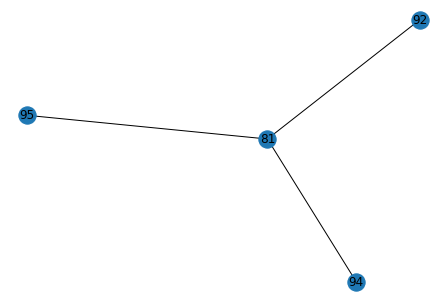

match_branches = [[94, 95], [81, 92]]
edges_to_delete (resolve crossover) = [[81, 94], [81, 95], [92, 94], [92, 95]]
edges_to_create (resolve crossover) = [[94, 95], [81, 92]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[81, 94], [81, 95], [92, 94], [92, 95]]
edges_to_create = [[94, 95], [81, 92]]
Number of connected components = 15
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {79}
Comp 3 = {128, 129, 130, 2, 9, 38, 

Angle between 9 and 66 = 95.71 
Angle between 9 and 85 = 93.85 
Angle between 9 and 92 = 94.13 
Angle between 9 and 94 = 99.22 
Angle between 9 and 99 = 30.0 
Angle between 66 and 85 = 129.22 
Angle between 66 and 92 = 63.01 
Angle between 66 and 94 = 91.19 
Angle between 66 and 99 = 57.25 
Angle between 85 and 92 = 13.9 
Angle between 85 and 94 = 41.33 
Angle between 85 and 99 = 79.14 
Angle between 92 and 94 = 151.78 
Angle between 92 and 99 = 88.29 
Angle between 94 and 99 = 70.05 
Final Matches = [[9, 99], [85, 92]]
matched_branches_revised = [[85, 92], [9, 99]]
Aligned Skeleton Parts


Original graph


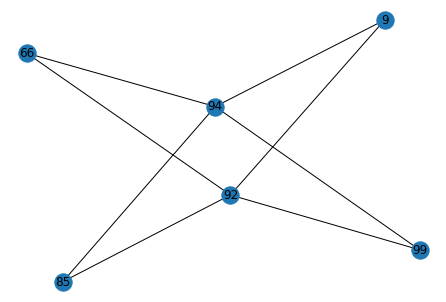

match_branches = [[85, 92], [9, 99]]
edges_to_delete (resolve crossover) = [[9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99]]
edges_to_create (resolve crossover) = [[85, 92], [9, 99]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], [81, 94], [81, 95], [92, 94], [92, 95]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99]]
edges_to_create = [[85, 92], [9, 99]]
Number of connected components = 18
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 1

Angle between 44 and 46 = 174.24 
Angle between 44 and 58 = 172.24 
Angle between 44 and 69 = 16.9 
Angle between 46 and 58 = 170.74 
Angle between 46 and 69 = 16.14 
Angle between 58 and 69 = 9.47 
Final Matches = [[44, 69], [46, 69], [58, 69]]
matched_branches_revised = [[58, 69]]
Aligned Skeleton Parts


Original graph


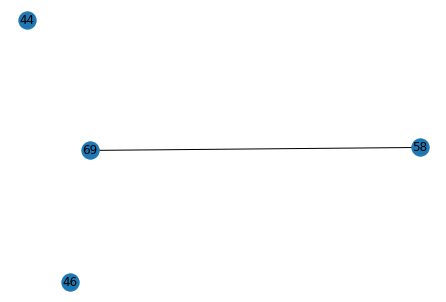

match_branches = [[58, 69]]
edges_to_delete (resolve crossover) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create (resolve crossover) = [[58, 69]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], [81, 94], [81, 95], [92, 94], [92, 95], [9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99]]
Skipping endnode 105 because skeletal distance was 592.115544039816 and threshold was 2500
skip_nodes = [105]
edges_to_delete (cut_limb_network) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create = [[58, 69]]
Number of connected components = 18
Com

Angle between 75 and 79 = 126.16 
Angle between 75 and 88 = 30.16 
Angle between 75 and 89 = 114.39 
Angle between 79 and 88 = 64.9 
Angle between 79 and 89 = 93.92 
Angle between 88 and 89 = 35.47 
Final Matches = [[75, 88]]
matched_branches_revised = [[75, 88]]
Aligned Skeleton Parts


Original graph


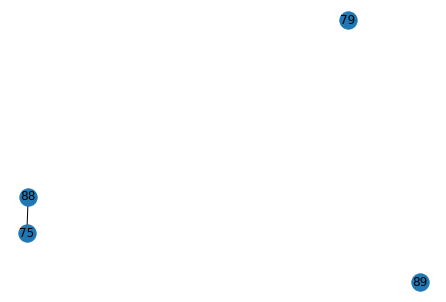

match_branches = [[75, 88]]
edges_to_delete (resolve crossover) = [[75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
edges_to_create (resolve crossover) = [[75, 88]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], [81, 94], [81, 95], [92, 94], [92, 95], [9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
Skipping endnode 105 because skeletal distance was 592.115544039816 and threshold was 2500
skip_nodes = [105]
edges_to_delete (cut_limb_network) = [[75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
edges_to_create = 

  Edge: [88 75]: curr_angle = 29.97
  Edge: [75 69]: curr_angle = 30.09
  Edge: [69 58]: curr_angle = 12.51
  Edge: [58 65]: curr_angle = 81.79
  Edge: [65 64]: curr_angle = 87.31
  Edge: [64 84]: curr_angle = 39.02
  Edge: [ 84 100]: curr_angle = 75.8

Total time for doubling_back = 0.3571949005126953

Attempting the width jump check (attempting from both sides)
  Edge: [88 75]: jump = -239.23
  Edge: [75 69]: jump = -144.97
  Edge: [69 58]: jump = -68.86
  Edge: [58 65]: jump = -223.03
  Edge: [65 64]: jump = 216.83
Adding error edge [65 64] because width jump was 216.82574037400224
  Edge: [64 84]: jump = 96.2
  Edge: [ 84 100]: jump = 239.65
Adding error edge [ 84 100] because width jump was 239.65093317445616
Total time for width = 0.3306589126586914
Path starting at 88 had err_edges: [[65, 64], [84, 100]]
  Edge: [100  84]: jump = -239.65
  Edge: [84 64]: jump = -96.2
  Edge: [64 65]: jump = -210.72
  Edge: [65 58]: jump = 229.13
Adding error edge [65 58] because width jump was 2

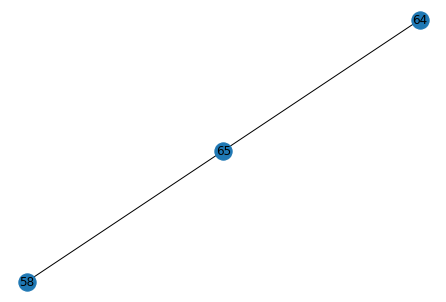

match_branches = [[58, 64]]
edges_to_delete (resolve crossover) = [[58, 65], [64, 65]]
edges_to_create (resolve crossover) = [[58, 64]]
edges_to_delete (cut_limb_network) = [array([58, 65]), array([64, 65])]
edges_to_create = [[58, 64]]
Number of connected components = 19
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {79}
Comp 3 = {129, 98, 130, 122, 123, 110, 124, 81, 51, 85, 121, 90, 91, 92}
Comp 4 = {128, 2, 38, 43, 48, 50, 56, 58, 59, 60, 64, 67, 69, 74, 75, 84, 88, 100, 105, 106, 117, 125, 126, 127}
Comp 5 = {68, 72, 80, 83, 89}
Comp 6 = {94.0, 95}
Comp 7 = {49}
Comp 8 = {18, 36, 37, 61, 70, 71, 78, 93, 101, 102, 103, 104, 107, 108, 109, 111, 112, 113, 114, 116, 118.0, 119, 120}
Comp 9 = {9, 99}
Comp 10 = {65, 66, 41}
Comp 11 = {44}
Comp 12 = {46}
Comp 13 = {62}
Comp 14 = {77}
Comp 15 = {87}
Comp 16 = {96}
Comp 17 = 

  Edge: [88 75]: curr_angle = 29.97
  Edge: [75 69]: curr_angle = 30.09
  Edge: [69 58]: curr_angle = 12.51
  Edge: [58 64]: curr_angle = 14.05
  Edge: [64 84]: curr_angle = 39.02
  Edge: [ 84 100]: curr_angle = 75.8

Total time for doubling_back = 0.34621429443359375

Attempting the width jump check (attempting from both sides)
  Edge: [88 75]: jump = -239.23
  Edge: [75 69]: jump = -144.97
  Edge: [69 58]: jump = -68.86
  Edge: [58 64]: jump = -12.31
  Edge: [64 84]: jump = 96.2
  Edge: [ 84 100]: jump = 239.65
Adding error edge [ 84 100] because width jump was 239.65093317445616
Total time for width = 0.31922364234924316
Path starting at 88 had err_edges: [[84, 100]]
  Edge: [100  84]: jump = -239.65
  Edge: [84 64]: jump = -96.2
  Edge: [64 58]: jump = 12.31
  Edge: [58 69]: jump = 68.86
  Edge: [69 75]: jump = 144.97
  Edge: [75 88]: jump = 239.23
Adding error edge [75 88] because width jump was 239.22716827027705
Total time for width = 0.31355857849121094
Path starting at 105 had

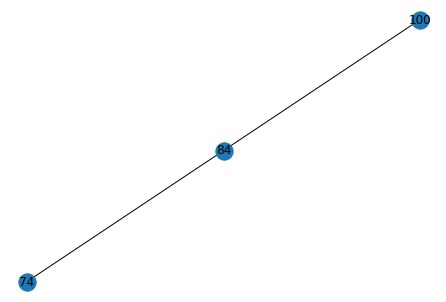

match_branches = [[84, 100]]
edges_to_delete (resolve crossover) = [[74, 84], [74, 100]]
edges_to_create (resolve crossover) = [[84, 100]]
Rejecting creating edge [84, 100] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([74, 84]), array([ 74, 100]), array([ 84, 100])]
edges_to_create = []
Number of connected components = 21
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {79}
Comp 3 = {129, 98, 130, 122, 123, 110, 124, 81, 51, 85, 121, 90, 91, 92}
Comp 4 = {64, 2, 67, 69, 38, 43, 75, 50, 84, 88, 58, 59}
Comp 5 = {68, 72, 80, 83, 89}
Comp 6 = {94.0, 95}
Comp 7 = {49}
Comp 8 = {18, 36, 37, 61, 70, 71, 78, 93, 101, 102, 103, 104, 107, 108, 109, 111, 112, 113, 114, 116, 118.0, 119, 120}
Comp 9 = {9, 99}
Comp 10 = {65, 66, 41}
Comp 11 = {44}
Comp 12 = {46}
Comp 13 = {56, 74, 6

curr_short_seg_revised = 114
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[1028590.          703306.5         854889.        ]
 [1029420.          703406.33333333  855602.        ]]
new_stitch_point = [1029005.          703356.41666667  855245.5       ]
More than one common endpoint so just choosing the first
More than one common endpoint so just choosing the first
Angles for [ 61. 112. 113. 118. 119. 120. 118.] are [6.7, 76.1, 82.65, 174.08, 58.89, 57.95, 174.08]
Branch that will absorb mesh of 114 is 61.0 
curr_short_seg_revised = 118
np.sum(touch_len>0) = 1
Using ONE stitch point
touching_endpoints = [[1029005.          703356.41666667  855245.5       ]
 [1029420.          703406.33333333  855602.        ]]
new_stitch_point = [1029005.          703356.41666667  855245.5       ]
curr_limb.deleted_edges 2=[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 6

Angle between 61 and 112 = 117.04 
Angle between 61 and 113 = 90.61 
Angle between 61 and 119 = 61.66 
Angle between 61 and 120 = 49.84 
Angle between 112 and 113 = 29.79 
Angle between 112 and 119 = 19.42 
Angle between 112 and 120 = 109.8 
Angle between 113 and 119 = 149.39 
Angle between 113 and 120 = 40.65 
Angle between 119 and 120 = 68.49 
Final Matches = [[112, 113], [112, 119]]
matched_branches_revised = [[112, 119]]
Aligned Skeleton Parts


Original graph


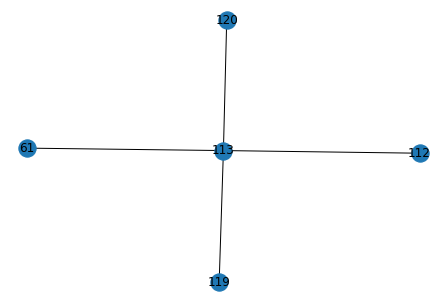

match_branches = [[112, 119]]
edges_to_delete (resolve crossover) = [[61, 112], [61, 113], [61, 119], [61, 120], [112, 113], [112, 120], [113, 119], [113, 120], [119, 120]]
edges_to_create (resolve crossover) = [[112, 119]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], [81, 94], [81, 95], [92, 94], [92, 95], [9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], array([58, 65]), array([64, 65]), array([74, 84]), array([ 74, 100]), array([ 84, 100])]
skip_nodes = []
edg

Angle between 41 and 43 = 139.06 
Angle between 41 and 44 = 6.08 
Angle between 41 and 47 = 40.32 
Angle between 43 and 44 = 37.16 
Angle between 43 and 47 = 20.94 
Angle between 44 and 47 = 145.48 
Final Matches = [[41, 44], [43, 47]]
matched_branches_revised = [[41, 44], [43, 47]]
Aligned Skeleton Parts


Original graph


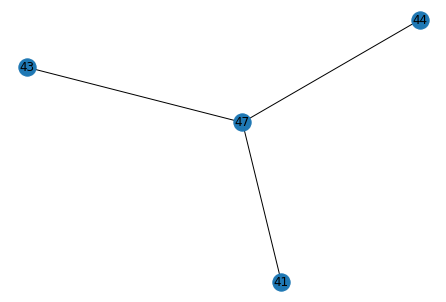

match_branches = [[41, 44], [43, 47]]
edges_to_delete (resolve crossover) = [[41, 43], [41, 47], [43, 44], [44, 47]]
edges_to_create (resolve crossover) = [[41, 44], [43, 47]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 47 because skeletal distance was 2062.8092837841264 and threshold was 2500
skip_nodes = [47]
edges_to_delete (cut_limb_network) = [[41, 43], [41, 47], [43, 44], [44, 47]]
edges_to_create = [[41, 44], [43, 47]]
Number of connected components = 3
Comp 0 = {35, 36, 38, 39, 40, 42, 43, 47, 21, 29}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 37, 41, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
Comp 2 = {60}
curr_limb_copy.deleted_edges = [[41, 43], [41, 47], [43, 44], [44, 47]]
curr_limb_copy.created_edges = [[41, 44], [43, 47]]
After get best cut: cut_edges = [[41, 43], [41, 47], [43, 44], [44, 47]], added_edges = [[41, 44], [43, 47]]
total_soma_paths_to_cut = []
------

Angle between 3 and 4 = 154.08 
Angle between 3 and 7 = 49.46 
Angle between 3 and 8 = 35.46 
Angle between 4 and 7 = 59.57 
Angle between 4 and 8 = 15.77 
Angle between 7 and 8 = 104.73 
Final Matches = [[4, 8]]
matched_branches_revised = [[4, 8]]
Aligned Skeleton Parts


Original graph


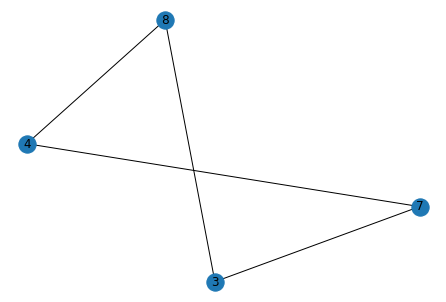

match_branches = [[4, 8]]
edges_to_delete (resolve crossover) = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]]
edges_to_create (resolve crossover) = [[4, 8]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]]
edges_to_create = [[4, 8]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4.0, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
Comp 1 = {7}
Comp 2 = {5}
curr_limb_copy.deleted_edges = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]]
curr_limb_copy.created_edges = [[4, 8]]
After get best cut: cut_edges = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]], added_edges = [[4, 8]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
Shortest path =

Angle between 2 and 6 = 108.51 
Angle between 2 and 8 = 127.07 
Angle between 2 and 9 = 23.59 
Angle between 2 and 10 = 80.54 
Angle between 6 and 8 = 149.53 
Angle between 6 and 9 = 73.01 
Angle between 6 and 10 = 9.52 
Angle between 8 and 9 = 45.47 
Angle between 8 and 10 = 35.4 
Angle between 9 and 10 = 99.97 
Final Matches = [[2, 9], [6, 10]]
matched_branches_revised = [[6, 10], [2, 9]]
Aligned Skeleton Parts


Original graph


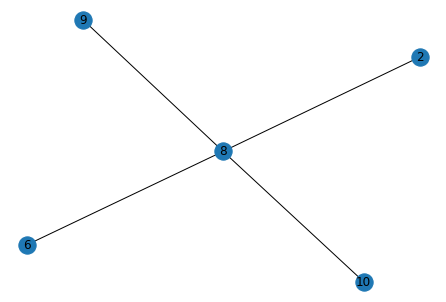

match_branches = [[6, 10], [2, 9]]
edges_to_delete (resolve crossover) = [[2, 6], [2, 8], [2, 10], [6, 8], [6, 9], [8, 9], [8, 10], [9, 10]]
edges_to_create (resolve crossover) = [[6, 10], [2, 9]]
curr_limb.deleted_edges 5 =[[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 6], [2, 8], [2, 10], [6, 8], [6, 9], [8, 9], [8, 10], [9, 10]]
edges_to_create = [[6, 10], [2, 9]]
Number of connected components = 5
Comp 0 = {8, 1, 3, 4.0}
Comp 1 = {7}
Comp 2 = {2, 37, 38, 9, 13, 14}
Comp 3 = {0, 6, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
Comp 4 = {5}
curr_limb_copy.deleted_edges = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8], [2, 6], [2, 8], [2, 10], [6, 8], [6, 9], [8, 9], [8, 10], [9, 10]]
curr_limb_copy.created_edges = [[4, 8], [6, 10], [2, 9]]
After get best cut: cut_edges = [[2, 6], [2, 8], [2, 10], [6, 8], [6, 9], [8, 9], [8, 10], [9, 10]], added_ed

Angle between 6 and 12 = 151.56 
Angle between 6 and 14 = 14.46 
Angle between 6 and 15 = 16.53 
Angle between 12 and 14 = 13.99 
Angle between 12 and 15 = 31.7 
Angle between 14 and 15 = 159.21 
Final Matches = [[6, 14], [6, 15], [12, 14], [12, 15]]
matched_branches_revised = [[12, 14], [6, 15]]
Aligned Skeleton Parts


Original graph


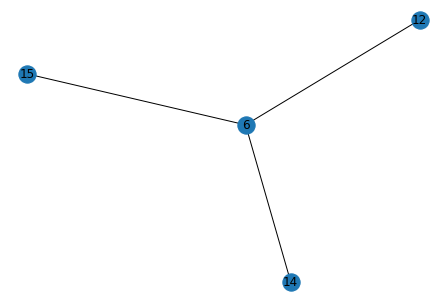

match_branches = [[12, 14], [6, 15]]
edges_to_delete (resolve crossover) = [[6, 12], [6, 14], [12, 15], [14, 15]]
edges_to_create (resolve crossover) = [[12, 14], [6, 15]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 0 because skeletal distance was 123.6292000672982 and threshold was 2500
skip_nodes = [0]
edges_to_delete (cut_limb_network) = [[6, 12], [6, 14], [12, 15], [14, 15]]
edges_to_create = [[12, 14], [6, 15]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 15, 16, 17}
Comp 1 = {3, 10, 11, 12, 13, 14}
curr_limb_copy.deleted_edges = [[6, 12], [6, 14], [12, 15], [14, 15]]
curr_limb_copy.created_edges = [[12, 14], [6, 15]]
After get best cut: cut_edges = [[6, 12], [6, 14], [12, 15], [14, 15]], added_edges = [[12, 14], [6, 15]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path

In [74]:
import proofreading_utils as pru
limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=True)

In [77]:
nviz.plot_split_suggestions_per_limb(neuron_obj,
                                    limb_results=limb_results,
                                    scatter_size=1)



-------- Suggestions for Limb 0------
Only 2 skeleton nodes so cannot do smoothing
More than one common endpoint so just choosing the first
More than one common endpoint so just choosing the first

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 1------

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 2------

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 3------

 Working on visualization type: mesh

 Working on visualization type: skeleton


# Getting Neuroglancer link

In [79]:
split_coordinates = pru.get_all_coordinate_suggestions(limb_results)

pru.split_coordinates_to_neuroglancer_link(split_coordinates,
                      neuron_obj.segment_id)

In [80]:
pru.split_info_to_neuroglancer_link(neuron_obj.segment_id,
                                   split_info=limb_results)